1. Load and Display Data → Read the dataset and print the first 5 rows.

In [126]:
import pandas as pd

In [127]:
df = pd.read_csv('./documents/covid_19_country_wise_latest.csv')

In [128]:
df.head()

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


2. Set the Dataset index is Unnamed: 0

In [129]:
df.set_index('Unnamed: 0', inplace=True)

In [130]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Unnamed: 0,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


3. Now replace the index column Unnamed: 0 name with index

In [131]:
df.index.name = 'index'

In [132]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
index,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


4. Create Function that take dataset columns and replace whitespace with Underscore and update dataset automatically and the pass the dataset.

In [133]:
def replace_whitespace_with_underscore(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

df = replace_whitespace_with_underscore(df)

5. Check Basic Information → Find column names, data types, and missing values.

In [134]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

In [135]:
print(df.isnull().sum())

Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New_cases                 10
New_deaths                10
New_recovered              0
Deaths_/_100_Cases         0
Recovered_/_100_Cases      0
Deaths_/_100_Recovered     0
Confirmed_last_week        0
1_week_change              0
1_week_%_increase          0
WHO_Region                 0
dtype: int64


6. Fill the nan values with the mean of the column

In [136]:
numeric_columns = df.select_dtypes(include=['number'])
df.fillna(numeric_columns.mean(), inplace=True)
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New_cases                 0
New_deaths                0
New_recovered             0
Deaths_/_100_Cases        0
Recovered_/_100_Cases     0
Deaths_/_100_Recovered    0
Confirmed_last_week       0
1_week_change             0
1_week_%_increase         0
WHO_Region                0
dtype: int64

7. Count the number of unique countries in the dataset.

In [137]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

8. Check if there are any duplicate country entries and remove them if needed.

In [138]:
df.duplicated(subset=['Country/Region'])

index
0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Length: 187, dtype: bool

9. Find the mean, median, and standard deviation of total cases

In [139]:
df['Confirmed'].mean()
df['Confirmed'].median()
df['Confirmed'].std()


np.float64(383318.6638306154)

In [140]:
df['Confirmed']

index
0      36263
1       4880
2      27973
3        907
4        950
       ...  
182    10621
183       10
184     1691
185     4552
186     2704
Name: Confirmed, Length: 187, dtype: int64

10. Find out the string in Deaths Column and replace it with the mean of Deaths column.

In [141]:
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
mean_deaths = df['Deaths'].mean()
df['Deaths'].fillna(mean_deaths, inplace=True)

C:\Users\Bilalraza\AppData\Local\Temp\ipykernel_2240\1802888156.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deaths'].fillna(mean_deaths, inplace=True)


11. Change the datatype of column Deaths

In [142]:
df['Deaths'] = df['Deaths'].astype(int)

12. Calculate total number of Death and Recovery all over the world

In [143]:
df['Deaths'].sum()
df['Recovered'].sum()

np.int64(9468087)

13. How many countries have more than 1 million total cases

In [144]:
df[df['Confirmed'] > 1000000]['Country/Region'].nunique()

3

14. Which countries have a recovery rate (Recovered / Total Cases) above 95%

In [145]:
df[((df['Recovered'] / df['Confirmed']) * 100) > 95]["Country/Region"]

index
24          Brunei
48        Djibouti
49        Dominica
69         Grenada
75        Holy See
78         Iceland
105       Malaysia
110      Mauritius
121    New Zealand
126         Norway
136          Qatar
164        Taiwan*
Name: Country/Region, dtype: object

15. Drop columns name WHO Region and Confirmed

In [146]:
df.drop(columns=['WHO_Region', 'Confirmed'], inplace=True)

16. Find the Country with the Max Deaths

In [147]:
df.loc[df['Deaths'].idxmax(), 'Country/Region']

'US'

 17. Sort Countries by Deaths (Descending Order

In [148]:
df.sort_values(by='Deaths', ascending=False)

,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase
index,,,,,,,,,,,,,
173,US,148011,1325804,2816444,56336.000000,1076.00000,27941,3.45,30.90,11.16,3834677,455582,11.88
23,Brazil,87618,1846641,508116,23284.000000,614.00000,33728,3.59,75.61,4.74,2118646,323729,15.28
177,United Kingdom,45844,1437,254427,688.000000,7.00000,3,15.19,0.48,3190.26,296944,4764,1.60
111,Mexico,44022,303810,47657,4973.000000,342.00000,8588,11.13,76.82,14.49,349396,46093,13.19
85,Italy,35112,198593,12581,168.000000,5.00000,147,14.26,80.64,17.68,244624,1662,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Bhutan,0,86,13,1282.740113,30.40113,1,0.00,86.87,0.00,90,9,10.00
130,Papua New Guinea,0,11,51,0.000000,0.00000,0,0.00,17.74,0.00,19,43,226.32
75,Holy See,0,12,0,0.000000,0.00000,0,0.00,100.00,0.00,12,0,0.00


18. Make new column name Total_cases that have a sum of Deaths, Recovered , Active

In [149]:
df['Total_cases'] = df['Deaths'] + df['Recovered'] + df['Active']

19. Calculate Death_Rate for Each Country (Deaths per Total Cases) by using formula (Deaths/Total_cases)*100 and save it in Death_Rate column

In [150]:
df['Death_Rate'] = (df['Deaths'] / df['Total_cases']) * 100

In [151]:
# df['Case_Increase'] = df['New_cases'] > 0
# low_death_rate_countries = df[(df['Case_Increase']) & (df['Death_Rate'] < 1)]

In [152]:
df['New_cases'] > 0

index
0       True
1       True
2       True
3       True
4       True
       ...  
182     True
183    False
184     True
185     True
186     True
Name: New_cases, Length: 187, dtype: bool

21. Print head of only 2 columns Country/Region and Death_Rate

In [153]:
df[['Country/Region', 'Death_Rate']].head()

,Country/Region,Death_Rate
index,,
0,Afghanistan,3.499435
1,Albania,2.950820
2,Algeria,4.157581
3,Andorra,5.733186
4,Angola,4.315789


22. Create a scatter plot comparing total cases and total deaths.

<Axes: title={'center': 'Scatter Plot of Total Cases vs Total Deaths'}, xlabel='Total Cases', ylabel='Total Deaths'>

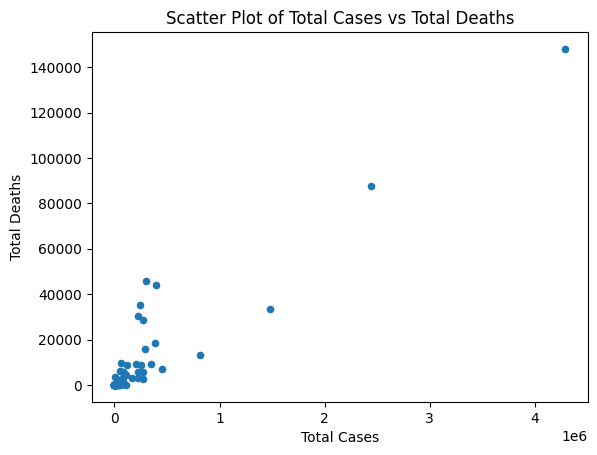

In [154]:
df.plot(kind='scatter', x='Total_cases', y='Deaths', 
        xlabel='Total Cases', ylabel='Total Deaths', 
        title='Scatter Plot of Total Cases vs Total Deaths')


In [ ]:
df.to_csv('updated_covid_19_country_wise_latest.csv', index=False)